# **Context**

A supermarket is a self-service shop offering a wide variety of food, beverages and household products, organized into sections. This kind of store is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market. In everyday U.S. usage, however, "grocery store" is synonymous with supermarket, and is not used to refer to other types of stores that sell groceries.

# **Content**

In the dataset, You'll get data of different stores of a supermarket company as per their store IDs which for ease has been converted to positive integers.

**Store ID:** (Index) ID of the particular store.

**Store_Area:** Physical Area of the store in yard square.

**Items_Available:** Number of different items available in the corresponding store.

**Daily_Customer_Count:** Number of customers who visited to stores on an average over month.

**Store_Sales:** Sales in (US $) that stores made.

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [25]:
df = pd.read_csv('/content/Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [29]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [31]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


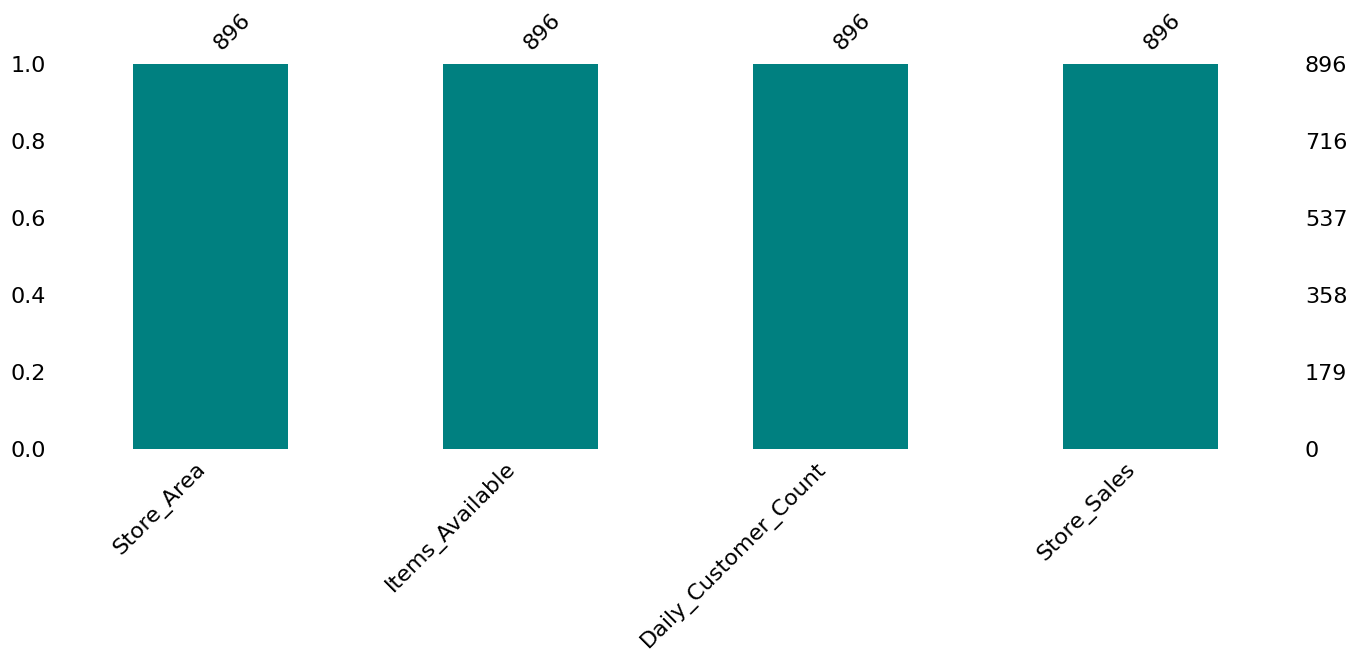

In [35]:
# Checking for gaps in the data
msno.bar(df, figsize = (16,5),color = "teal")
plt.show()

In [42]:
for col in df.columns:
  unique_values = len(df[col].unique())
  print(col, 'unique calues: ' , unique_values)

Store_Area unique calues:  583
Items_Available unique calues:  616
Daily_Customer_Count unique calues:  130
Store_Sales unique calues:  816


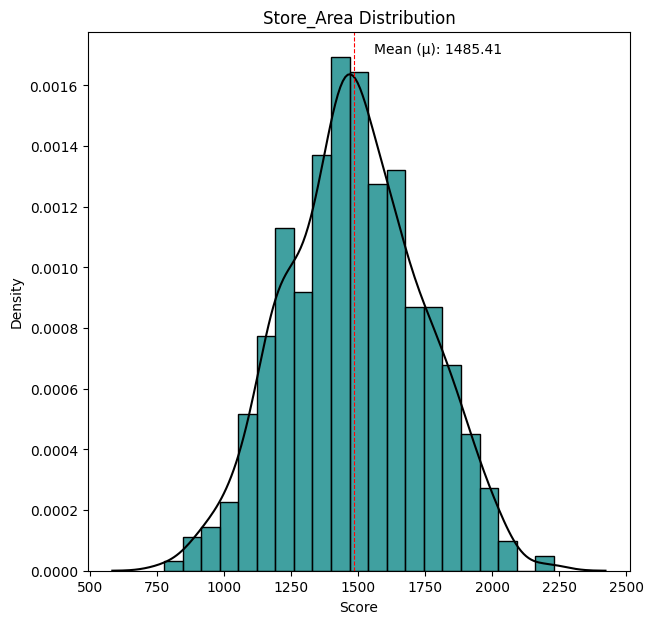

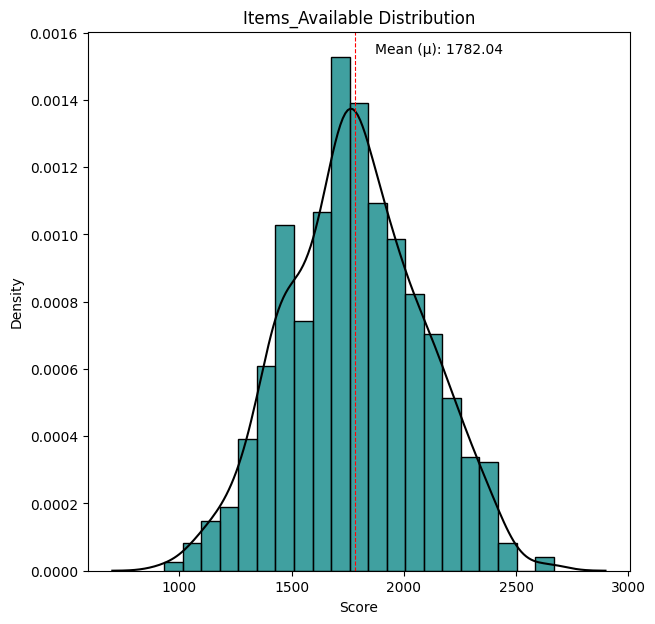

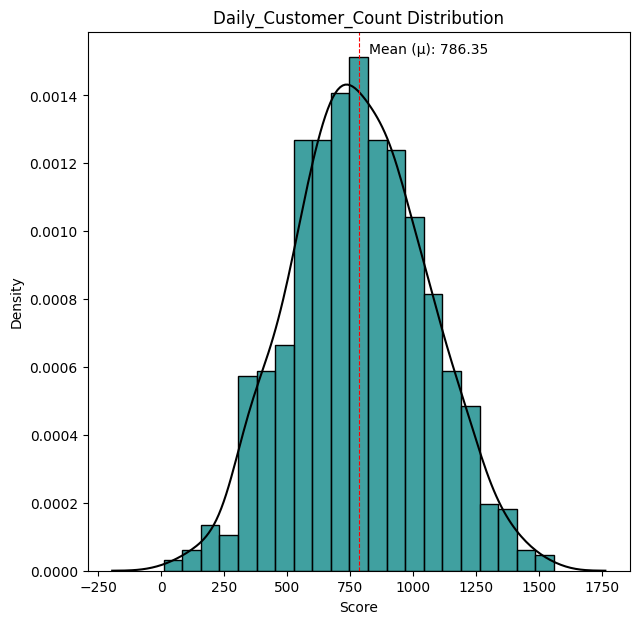

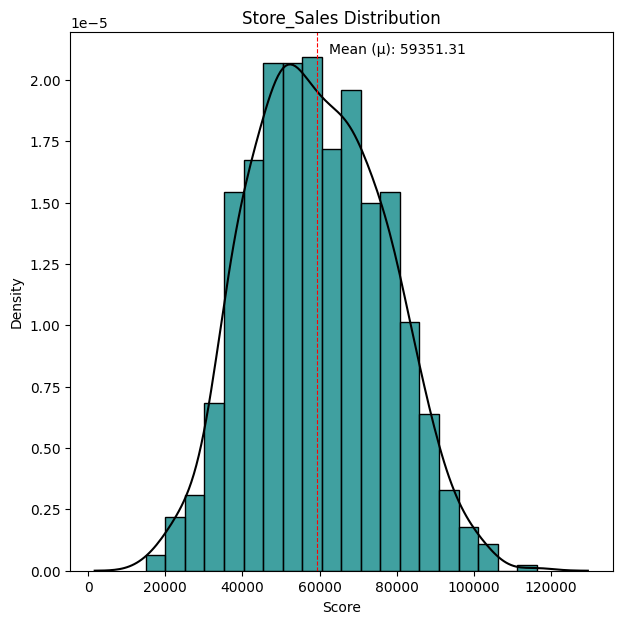

In [44]:
#Analyzing the distribution of the features
for column_name in df.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density',color='teal')
  sns.kdeplot(df[column_name], color='black')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

Distribution Observations: The diagonal histograms show that:

* Store Area and Items Available: Both have a roughly normal distribution, indicating a concentration of stores around a common size and inventory range.

* Daily Customer Count: This variable appears to be more evenly spread but has a peak around a certain range, suggesting most stores have a similar daily customer flow.

* Store Sales: This also appears to have a somewhat normal distribution, with most sales figures clustering around a central range.

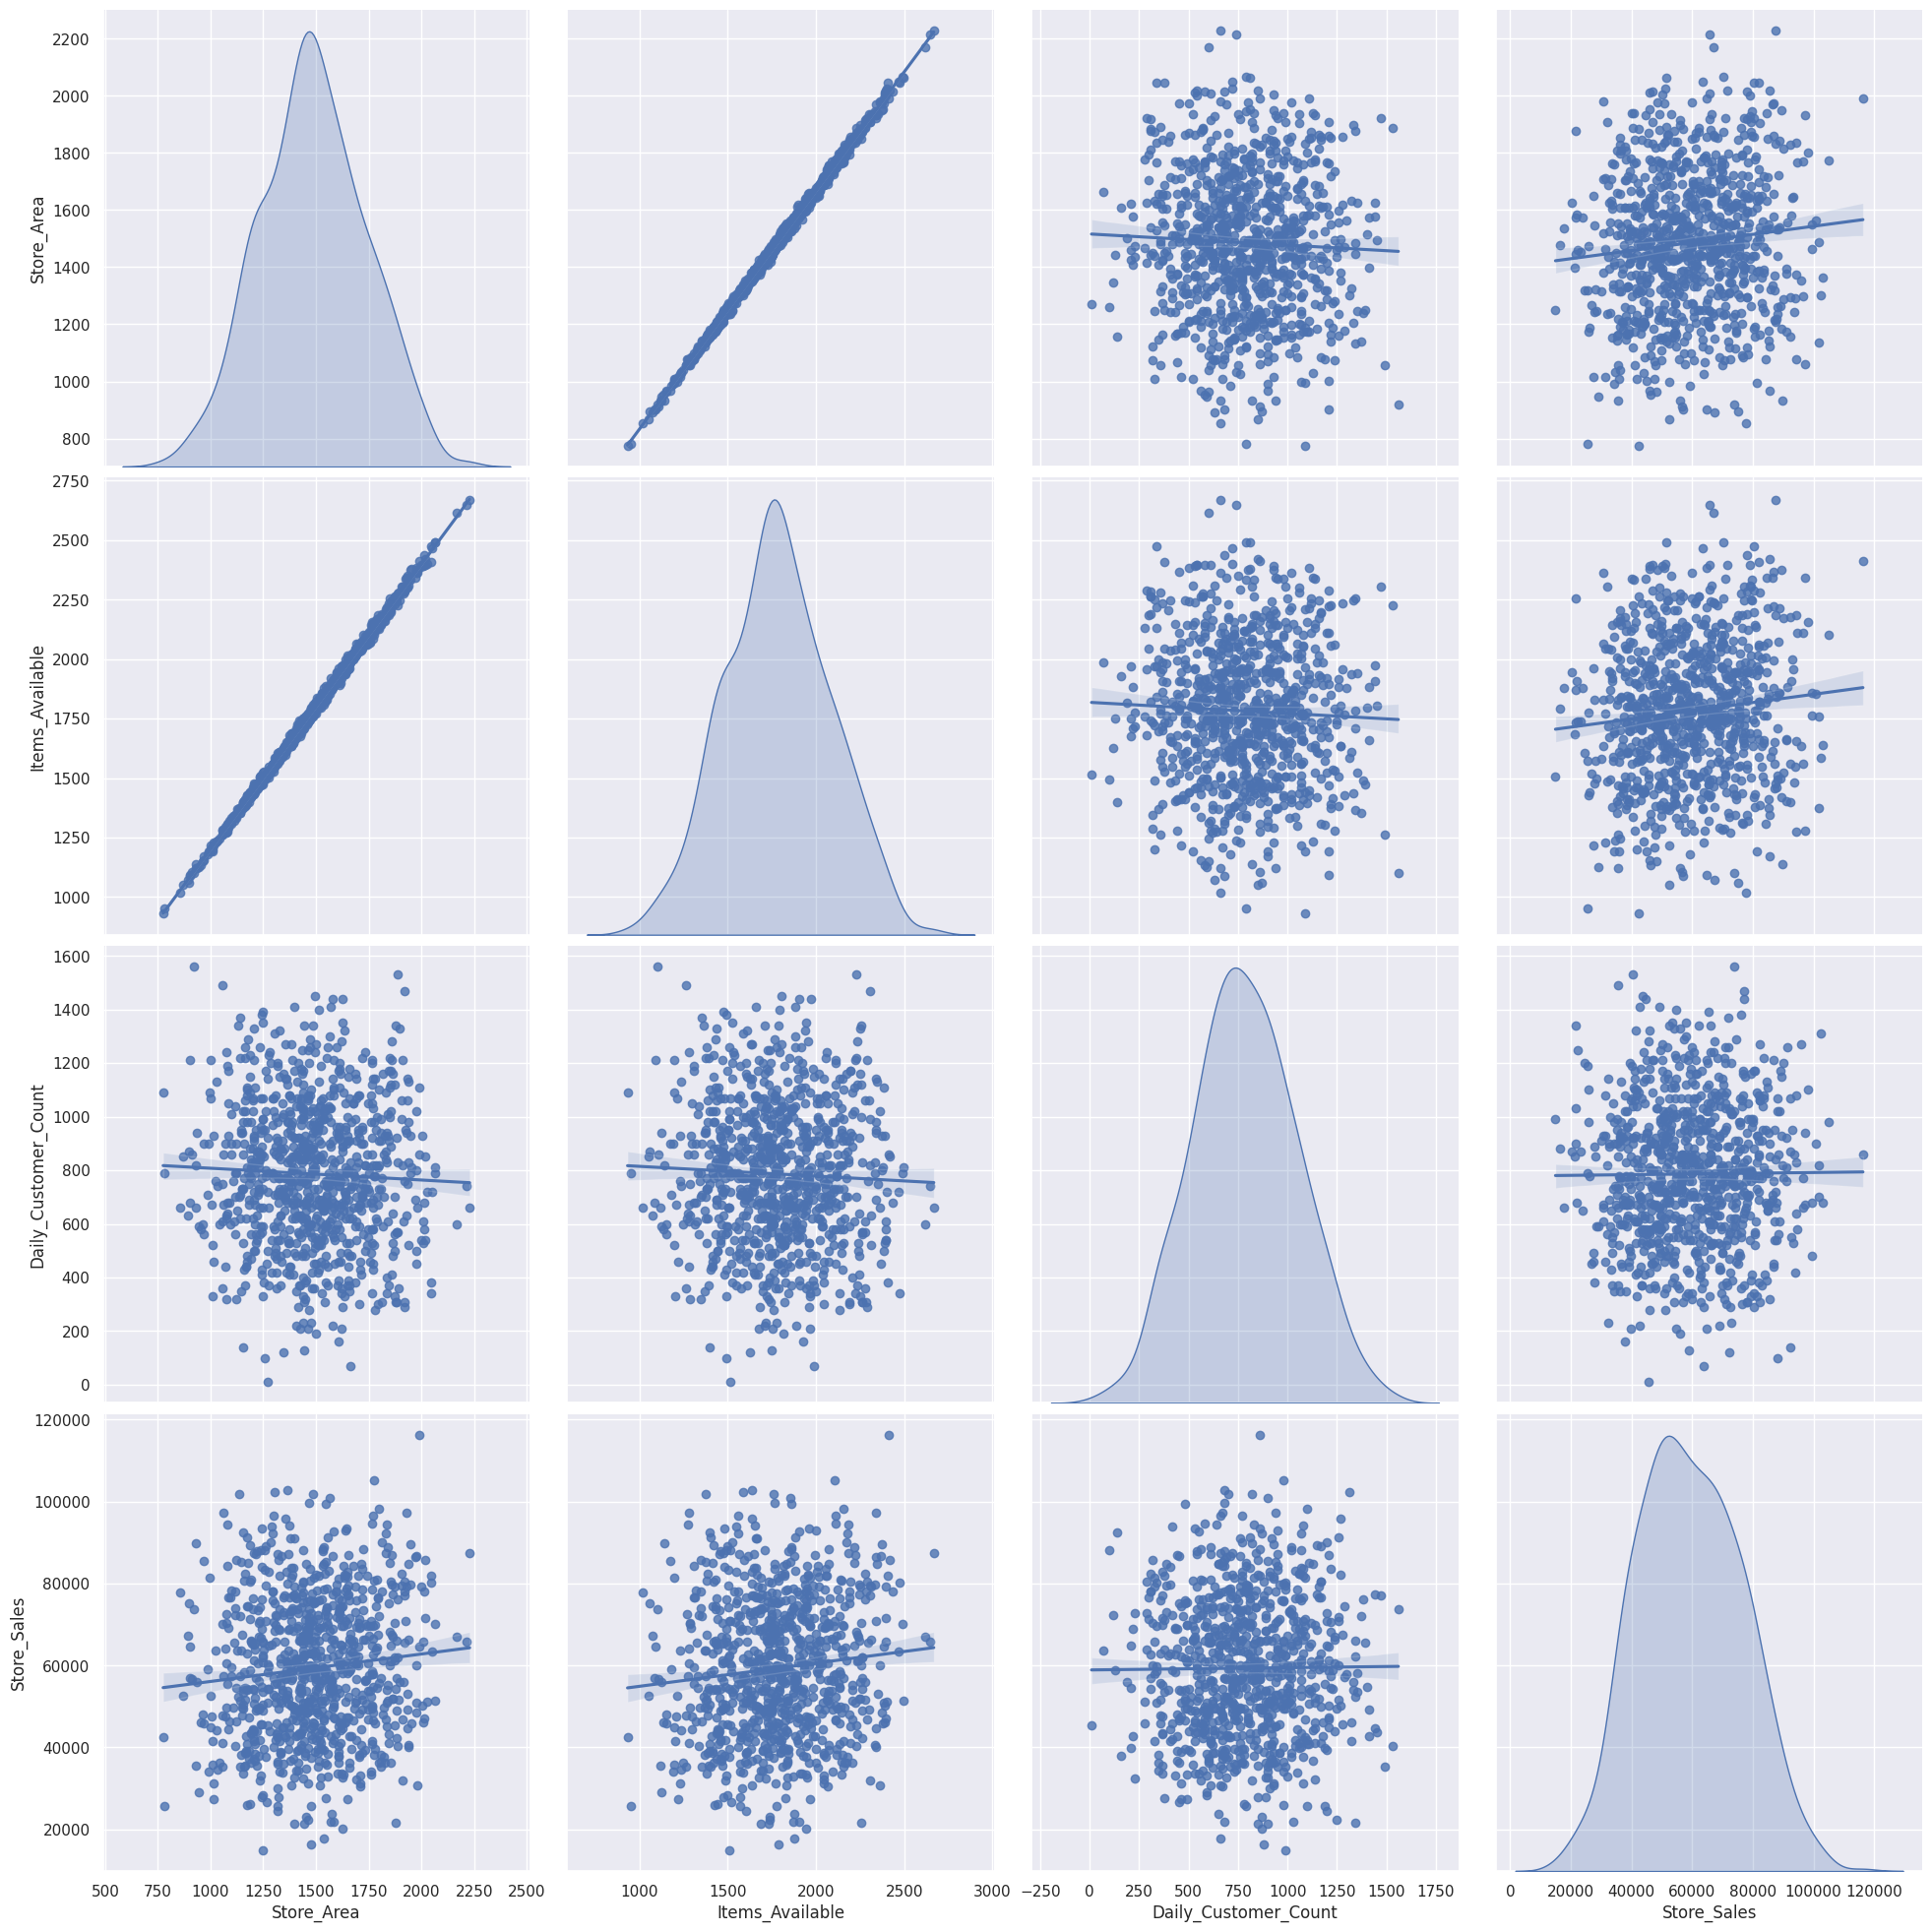

In [46]:
sns.set()
sns.pairplot(df,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

* Store Area and Items Available: There is a strong positive linear correlation between store area and the number of items available. This suggests that as the store's area increases, it tends to hold more items, which is logical since a larger space can accommodate a greater inventory.

* Store Area and Store Sales: There is a slight positive trend between store area and store sales, indicating that larger stores might be associated with higher sales. However, the correlation does not appear very strong, suggesting other factors might influence sales more significantly.

* Items Available and Store Sales: Similar to the store area, the relationship between the number of items available and store sales shows a slight positive trend. Stores with more items available could see marginally higher sales, but it’s not a dominant factor.

* Daily Customer Count: The scatterplots between the daily customer count and other variables (store area, items available, and store sales) show a relatively random distribution, suggesting that the number of customers per day does not have a strong correlation with these factors. It implies that other external factors might be influencing customer numbers, such as location or store popularity.

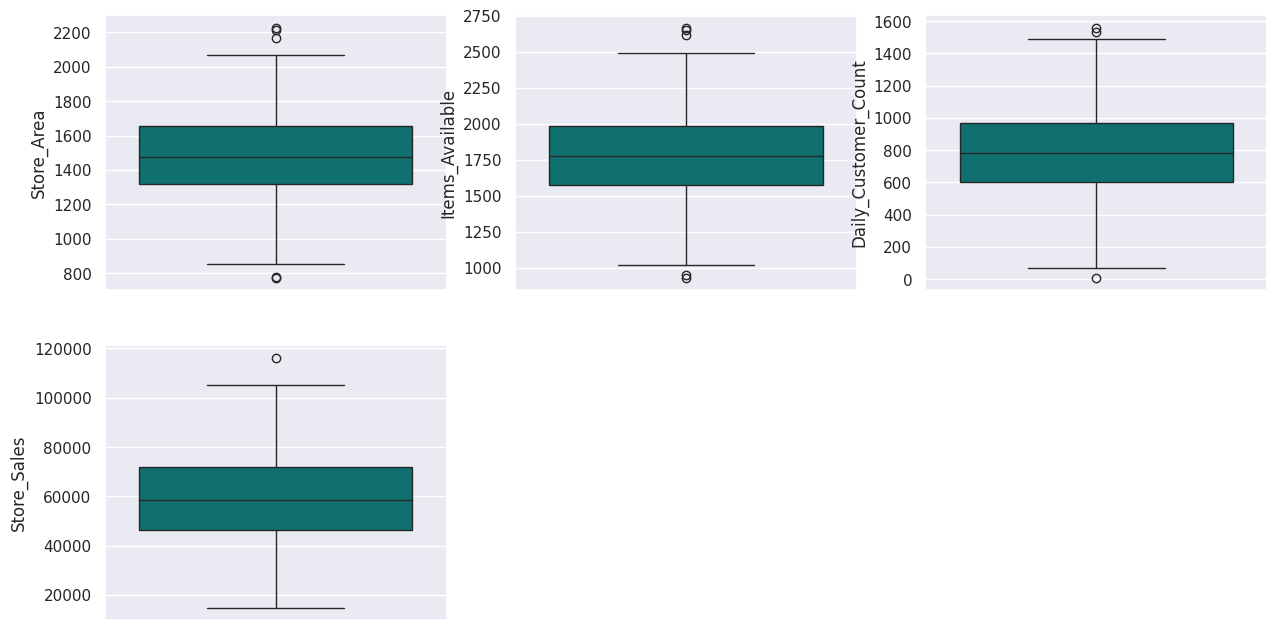

In [49]:
i=1
plt.figure(figsize=(15,25))
for feature in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature],color='teal')
    i+=1

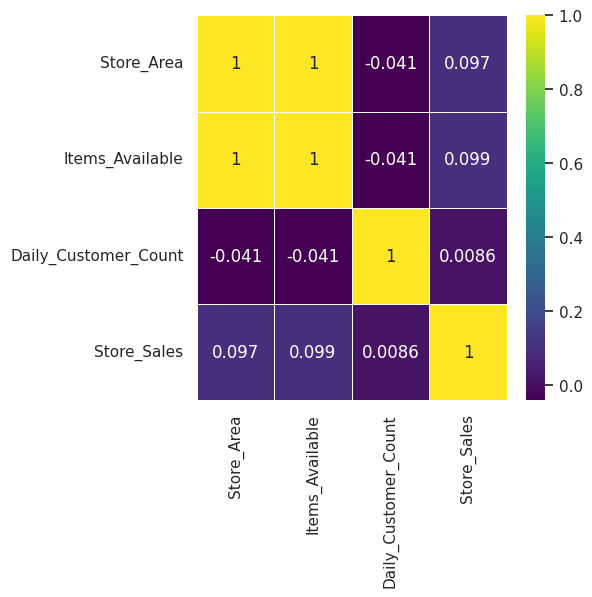

In [57]:
# Visualizing the correlation between features
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis', linecolor='white', linewidths=0.5)
plt.show()

The heatmap provided shows the correlation coefficients between different variables in the dataset. Here are the conclusions based on the heatmap:

* Store Area and Items Available: There is a perfect positive correlation (correlation coefficient = 1) between store area and items available. This means that as the store area increases, the number of items available increases proportionally, which aligns with logical expectations since larger stores can stock more products.

* Store Sales and Store Area/Items Available: The correlation coefficients between store sales and store area (0.097) and store sales and items available (0.099) are positive but very weak. This indicates that while there is some relationship between larger stores or those with more items and slightly higher sales, it's not a strong predictor of sales performance.

* Daily Customer Count: The daily customer count has very weak or nearly zero correlation with all other variables, including store sales (0.0086). This suggests that the number of daily customers does not directly correlate with how large the store is, how many items it stocks, or even the revenue it generates. It could mean that factors like customer purchasing behavior or external factors influence customer numbers more than store characteristics.

* Overall Correlation Patterns: The matrix shows that most variables have very weak correlations with each other, aside from the relationship between store area and items available. This suggests that the dataset might require additional variables or deeper analysis (e.g., seasonal trends, marketing efforts) to understand the factors driving store sales and customer behavior.

In summary, while store size and inventory affect sales to a limited extent, other factors not present in this dataset might play a larger role in driving revenue and customer count.